In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

71.70400415396864 100.69380943464421
-31.56545148079161 65.7457035955691
3.5359294022558885 -89.5062493440405
79.97031666504441 -135.68229122841706
-82.20933387011526 -58.83985474472125
-72.77276949989957 76.97208201214477
-56.16822813601664 71.13383680517856
11.949303966156563 -69.50130146251567
-32.20830246351129 -170.49100766206092
19.298446728367168 -26.02787806313026
-83.47671412444 178.62826662614378
-63.48338188033476 -164.14977797989522
32.514717414389395 -148.5432518929433
-21.16191164156875 157.037373059453
-3.6032278394932717 -106.0394858010798
84.19697052115242 -64.54485915957554
45.9785636494461 -31.40827040887001
-29.74835159908517 26.775763666497028
54.88792424655779 26.26321933464513
33.21219073702852 135.12594508951128
-39.56977316592178 -59.551341806682515
27.18747908268172 102.59421143327012
9.369101290670173 104.04037936230179
-89.01163129884252 61.8460290355473
-0.5908695560955834 -107.66341776426378
-79.58169961497947 -101.65184261017826
2.185577462352896 38.07755

31.041476861549583 137.75184849460908
-8.12118383237079 123.6159629622282
-10.392431452602636 -19.449634890821045
59.963389228285365 -162.44737282770805
62.03457738209292 53.66791424329449
-85.00277317572187 -88.32495140725523
-89.38676506820354 93.56932534600719
9.803263956434208 27.356217883296807
79.85399509264786 -0.847255802319637
20.012126180732963 -140.23082953277134
87.42292048066182 64.15403133601342
89.73597170197576 -109.63799371418776
34.27649187972908 -17.064641252663534
-35.01291155004806 106.11886137460135
36.7077239144962 65.29606038073123
-56.307869066365484 122.05154683999484
-26.024612669642806 -170.25828675429744
60.73196907802591 -135.8839355376989
-35.964815175124336 113.7042484200415


In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

630

In [7]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [9]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [10]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=14198eb077e86cb1008a1ee598e618dc


In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(1)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
     # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
           # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

 # If an error is experienced, skip the city.
    except:
            print("City not found. Skipping...")
    pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | khatanga
Processing Record 2 of Set 1 | mahebourg
Processing Record 3 of Set 1 | puerto ayora
Processing Record 4 of Set 1 | tuktoyaktuk
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | busselton
Processing Record 7 of Set 1 | saint-philippe
Processing Record 8 of Set 1 | soto
Processing Record 9 of Set 1 | vaini
Processing Record 10 of Set 1 | ponta do sol
Processing Record 11 of Set 1 | kaitangata
Processing Record 12 of Set 1 | avarua
Processing Record 13 of Set 1 | kahului
Processing Record 14 of Set 1 | hervey bay
Processing Record 15 of Set 1 | narsaq
Processing Record 16 of Set 1 | lagoa
Processing Record 17 of Set 1 | mafeteng
Processing Record 18 of Set 1 | svencionys
Processing Record 19 of Set 1 | tanabe
Processing Record 20 of Set 1 | necochea
Processing Record 21 of Set 1 | xichang
Processing Record 22 of Set 1 | ca mau
Processing Record 23 of Set 1 | east london
Processing Record 24 of Set 1 | punta arenas
Processing Rec

Processing Record 43 of Set 4 | coquimbo
Processing Record 44 of Set 4 | correntina
Processing Record 45 of Set 4 | bengkalis
City not found. Skipping...
Processing Record 46 of Set 4 | bogorodskoye
Processing Record 47 of Set 4 | mys shmidta
City not found. Skipping...
Processing Record 48 of Set 4 | illoqqortoormiut
City not found. Skipping...
Processing Record 49 of Set 4 | castro
Processing Record 50 of Set 4 | dawei
Processing Record 1 of Set 5 | beringovskiy
Processing Record 2 of Set 5 | luderitz
Processing Record 3 of Set 5 | georgetown
Processing Record 4 of Set 5 | mitsamiouli
Processing Record 5 of Set 5 | mosetse
Processing Record 6 of Set 5 | marienburg
Processing Record 7 of Set 5 | barrow
Processing Record 8 of Set 5 | svetlyy
Processing Record 9 of Set 5 | kazachinskoye
Processing Record 10 of Set 5 | yulara
Processing Record 11 of Set 5 | port macquarie
Processing Record 12 of Set 5 | killybegs
Processing Record 13 of Set 5 | murmashi
Processing Record 14 of Set 5 | ni

City not found. Skipping...
Processing Record 35 of Set 8 | khani
Processing Record 36 of Set 8 | asayita
City not found. Skipping...
Processing Record 37 of Set 8 | hobyo
Processing Record 38 of Set 8 | oda
Processing Record 39 of Set 8 | kawerau
Processing Record 40 of Set 8 | severo-kurilsk
Processing Record 41 of Set 8 | lahaina
Processing Record 42 of Set 8 | griffith
Processing Record 43 of Set 8 | hit
Processing Record 44 of Set 8 | omsukchan
Processing Record 45 of Set 8 | barretos
Processing Record 46 of Set 8 | srednekolymsk
Processing Record 47 of Set 8 | margate
Processing Record 48 of Set 8 | lamu
Processing Record 49 of Set 8 | nuuk
Processing Record 50 of Set 8 | tallahassee
Processing Record 1 of Set 9 | mossendjo
Processing Record 2 of Set 9 | muros
Processing Record 3 of Set 9 | bokspits
City not found. Skipping...
Processing Record 4 of Set 9 | lasa
Processing Record 5 of Set 9 | nome
Processing Record 6 of Set 9 | klaksvik
Processing Record 7 of Set 9 | hovd
Process

Processing Record 25 of Set 12 | tongliao
Processing Record 26 of Set 12 | acapulco
Processing Record 27 of Set 12 | mormugao
Processing Record 28 of Set 12 | ileza
Processing Record 29 of Set 12 | gushikawa
Processing Record 30 of Set 12 | tommot
Processing Record 31 of Set 12 | cockburn town
Processing Record 32 of Set 12 | sechura
Processing Record 33 of Set 12 | murray bridge
Processing Record 34 of Set 12 | schweinfurt
Processing Record 35 of Set 12 | camana
Processing Record 36 of Set 12 | bajo baudo
City not found. Skipping...
Processing Record 37 of Set 12 | razole
Processing Record 38 of Set 12 | yakeshi
Processing Record 39 of Set 12 | wajima
Processing Record 40 of Set 12 | nago
Processing Record 41 of Set 12 | okha
Processing Record 42 of Set 12 | el vigia
Processing Record 43 of Set 12 | luanda
Processing Record 44 of Set 12 | dalianwan
Processing Record 45 of Set 12 | codrington
Processing Record 46 of Set 12 | seydisehir
Processing Record 47 of Set 12 | gamba
Processing 

In [12]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Khatanga,71.9667,102.5000,37.74,90,100,8.48,RU,2022-07-12 17:35:25
1,Mahebourg,-20.4081,57.7000,72.25,64,75,16.11,MU,2022-07-12 17:37:56
2,Puerto Ayora,-0.7393,-90.3518,76.96,82,40,8.99,EC,2022-07-12 17:38:40
3,Tuktoyaktuk,69.4541,-133.0374,41.00,100,100,10.36,CA,2022-07-12 17:38:40
4,Ushuaia,-54.8000,-68.3000,38.86,81,75,11.50,AR,2022-07-12 17:38:41
5,Busselton,-33.6500,115.3333,56.05,83,25,6.64,AU,2022-07-12 17:38:41
6,Saint-Philippe,-21.3585,55.7679,71.19,74,25,12.77,RE,2022-07-12 17:38:42
7,Soto,-32.8107,-61.4026,55.04,31,0,7.67,AR,2022-07-12 17:38:42
8,Vaini,-21.2000,-175.2000,71.76,100,40,6.91,TO,2022-07-12 17:38:43
9,Ponta Do Sol,32.6667,-17.1000,74.71,66,60,5.82,PT,2022-07-12 17:38:44


In [13]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness","Wind Speed"]
city_data_df = city_data_df[new_column_order]

In [14]:
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Khatanga,RU,2022-07-12 17:35:25,71.9667,102.5000,37.74,90,100,8.48
1,Mahebourg,MU,2022-07-12 17:37:56,-20.4081,57.7000,72.25,64,75,16.11
2,Puerto Ayora,EC,2022-07-12 17:38:40,-0.7393,-90.3518,76.96,82,40,8.99
3,Tuktoyaktuk,CA,2022-07-12 17:38:40,69.4541,-133.0374,41.00,100,100,10.36
4,Ushuaia,AR,2022-07-12 17:38:41,-54.8000,-68.3000,38.86,81,75,11.50
5,Busselton,AU,2022-07-12 17:38:41,-33.6500,115.3333,56.05,83,25,6.64
6,Saint-Philippe,RE,2022-07-12 17:38:42,-21.3585,55.7679,71.19,74,25,12.77
7,Soto,AR,2022-07-12 17:38:42,-32.8107,-61.4026,55.04,31,0,7.67
8,Vaini,TO,2022-07-12 17:38:43,-21.2000,-175.2000,71.76,100,40,6.91
9,Ponta Do Sol,PT,2022-07-12 17:38:44,32.6667,-17.1000,74.71,66,60,5.82


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

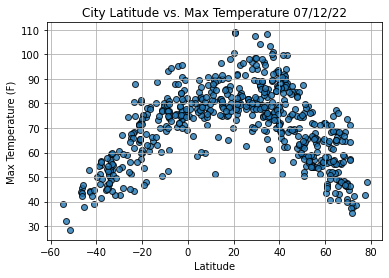

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

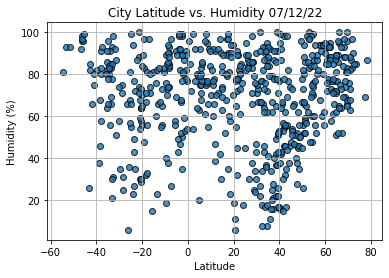

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

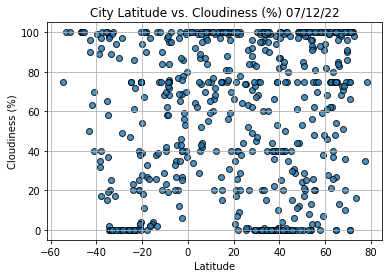

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

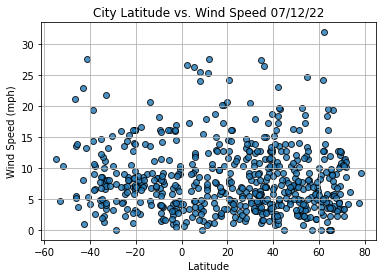

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [21]:
# Import linear regression from the SciPy stats module.
from scipy.stats import linregress

In [22]:


# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [23]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

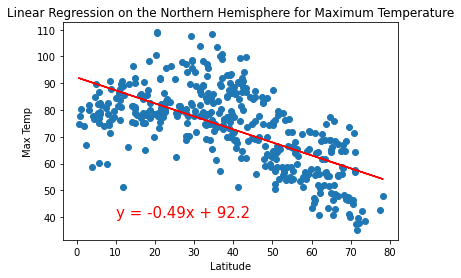

In [28]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

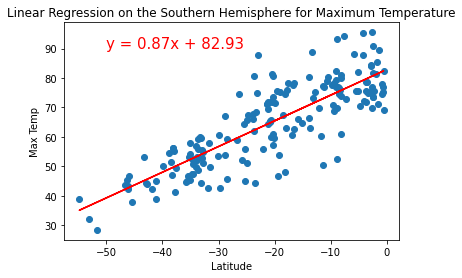

In [29]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

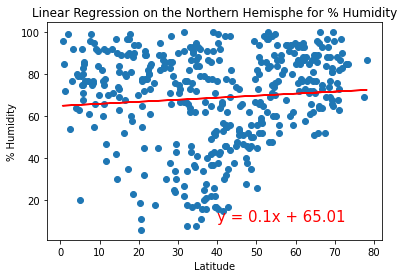

In [30]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphe for % Humidity', '% Humidity',(40,10))

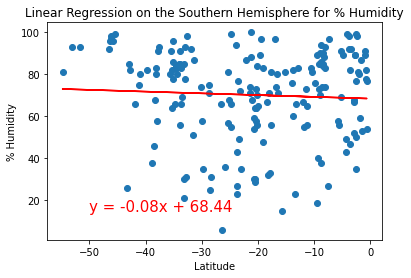

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

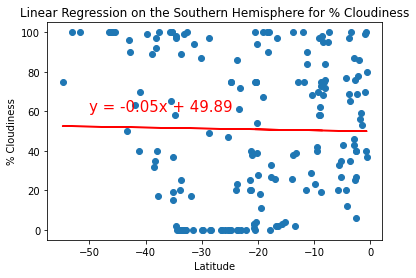

In [32]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

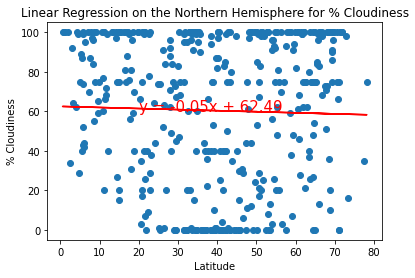

In [35]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(20,60))

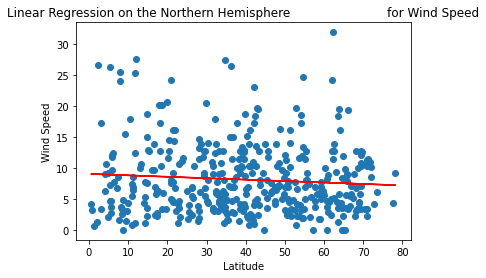

In [36]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

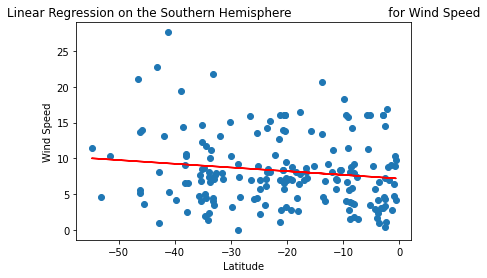

In [37]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))